In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/e2e_processed_h2_appliance.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/logs/2023.06.23/13.40.34.227331.log
/content/.config/logs/2023.06.23/13.39.35.724212.log
/content/.config/logs/2023.06.23/13.41.17.388465.log
/content/.config/logs/2023.06.23/13.40.48.465045.log
/content/.config/logs/2023.06.23/13.40.06.305076.log
/content/.config/logs/2023.06.23/13.41.18.242949.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/e2e_processed_h2_appliance.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 100]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        # plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        # plt.ylabel('counts')
        plt.ylabel('counts', rotation = 0)
        plt.xlabel('watts')
        # plt.xticks(rotation = 90)
        plt.xticks(rotation = 0)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    # df = df.dropna('columns') # drop columns with NaN
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    print(df)
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        # ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [132]:
# nRowsRead = 5000000 # specify 'None' if want to read whole file
nRowsRead = None
# e2e_demo_processed_h2_appliance.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
# df1 = pd.read_csv('/home/edmondium/e2e_processed_h2_appliance.csv', delimiter=',', nrows = nRowsRead)
df1 = pd.read_csv('/content/e2e_processed_h2_appliance.csv', delimiter=',', nrows = nRowsRead, index_col=0, parse_dates=True)
df1.dataframeName = 'e2e_processed_h2_appliance.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7074143 rows and 19 columns


In [133]:
df1.head(5)

,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
time,,,,,,,,,,,,,,,,,,,
2013-02-17 23:39:19,NaN,NaN,NaN,NaN,NaN,62.0,14.0,NaN,NaN,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17 23:39:25,NaN,NaN,NaN,NaN,NaN,61.0,14.0,NaN,NaN,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17 23:39:31,NaN,NaN,NaN,NaN,NaN,62.0,14.0,NaN,NaN,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17 23:39:37,NaN,NaN,NaN,NaN,NaN,62.0,14.0,NaN,NaN,22.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17 23:39:43,NaN,NaN,NaN,NaN,NaN,62.0,14.0,NaN,NaN,22.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


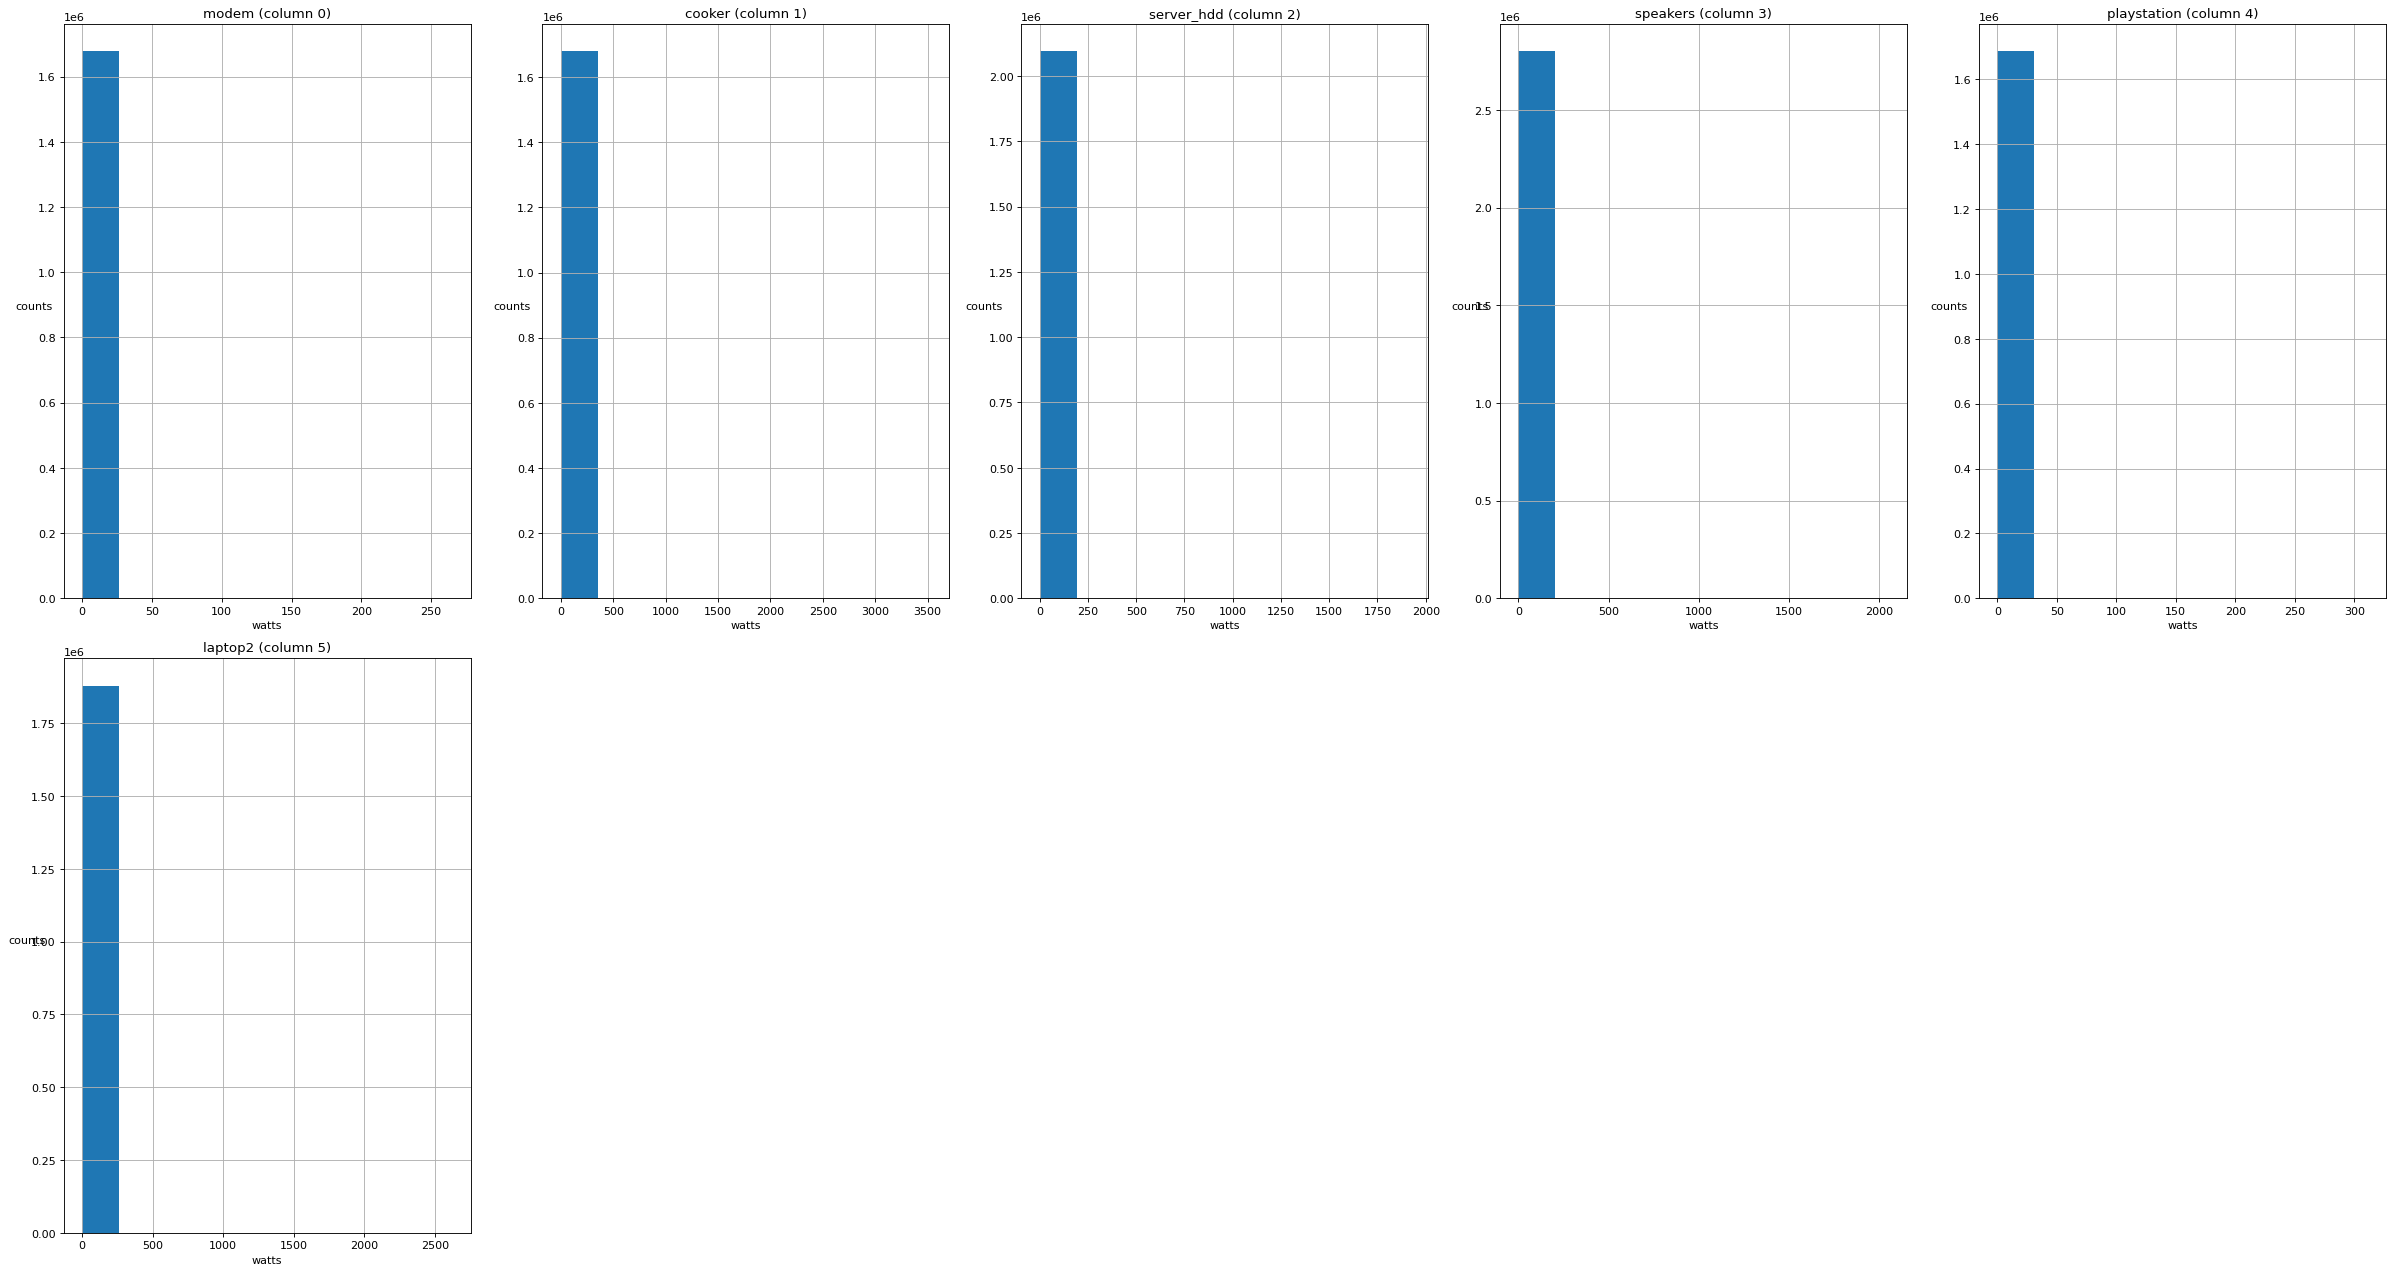

In [134]:
plotPerColumnDistribution(df1, 10, 5)
# plotPerColumnDistribution(df1, 10, 1)

In [135]:
plotCorrelationMatrix(df1, 8)

No correlation plots shown: The number of non-NaN or constant columns (0) is less than 2


                     modem  cooker  rice_cooker  kettle  aggregate  monitor  \
time                                                                          
2013-02-17 23:39:19    NaN     NaN          NaN     NaN        NaN     62.0   
2013-02-17 23:39:25    NaN     NaN          NaN     NaN        NaN     61.0   
2013-02-17 23:39:31    NaN     NaN          NaN     NaN        NaN     62.0   
2013-02-17 23:39:37    NaN     NaN          NaN     NaN        NaN     62.0   
2013-02-17 23:39:43    NaN     NaN          NaN     NaN        NaN     62.0   
...                    ...     ...          ...     ...        ...      ...   
2013-10-10 13:15:45    NaN     NaN          1.0     NaN        NaN      NaN   
2013-10-10 13:15:50    NaN     NaN          NaN     1.0      132.0      NaN   
2013-10-10 13:15:51    NaN     NaN          1.0     NaN        NaN      NaN   
2013-10-10 13:15:56    NaN     NaN          NaN     1.0        NaN      NaN   
2013-10-10 13:15:58    NaN     NaN          1.0     

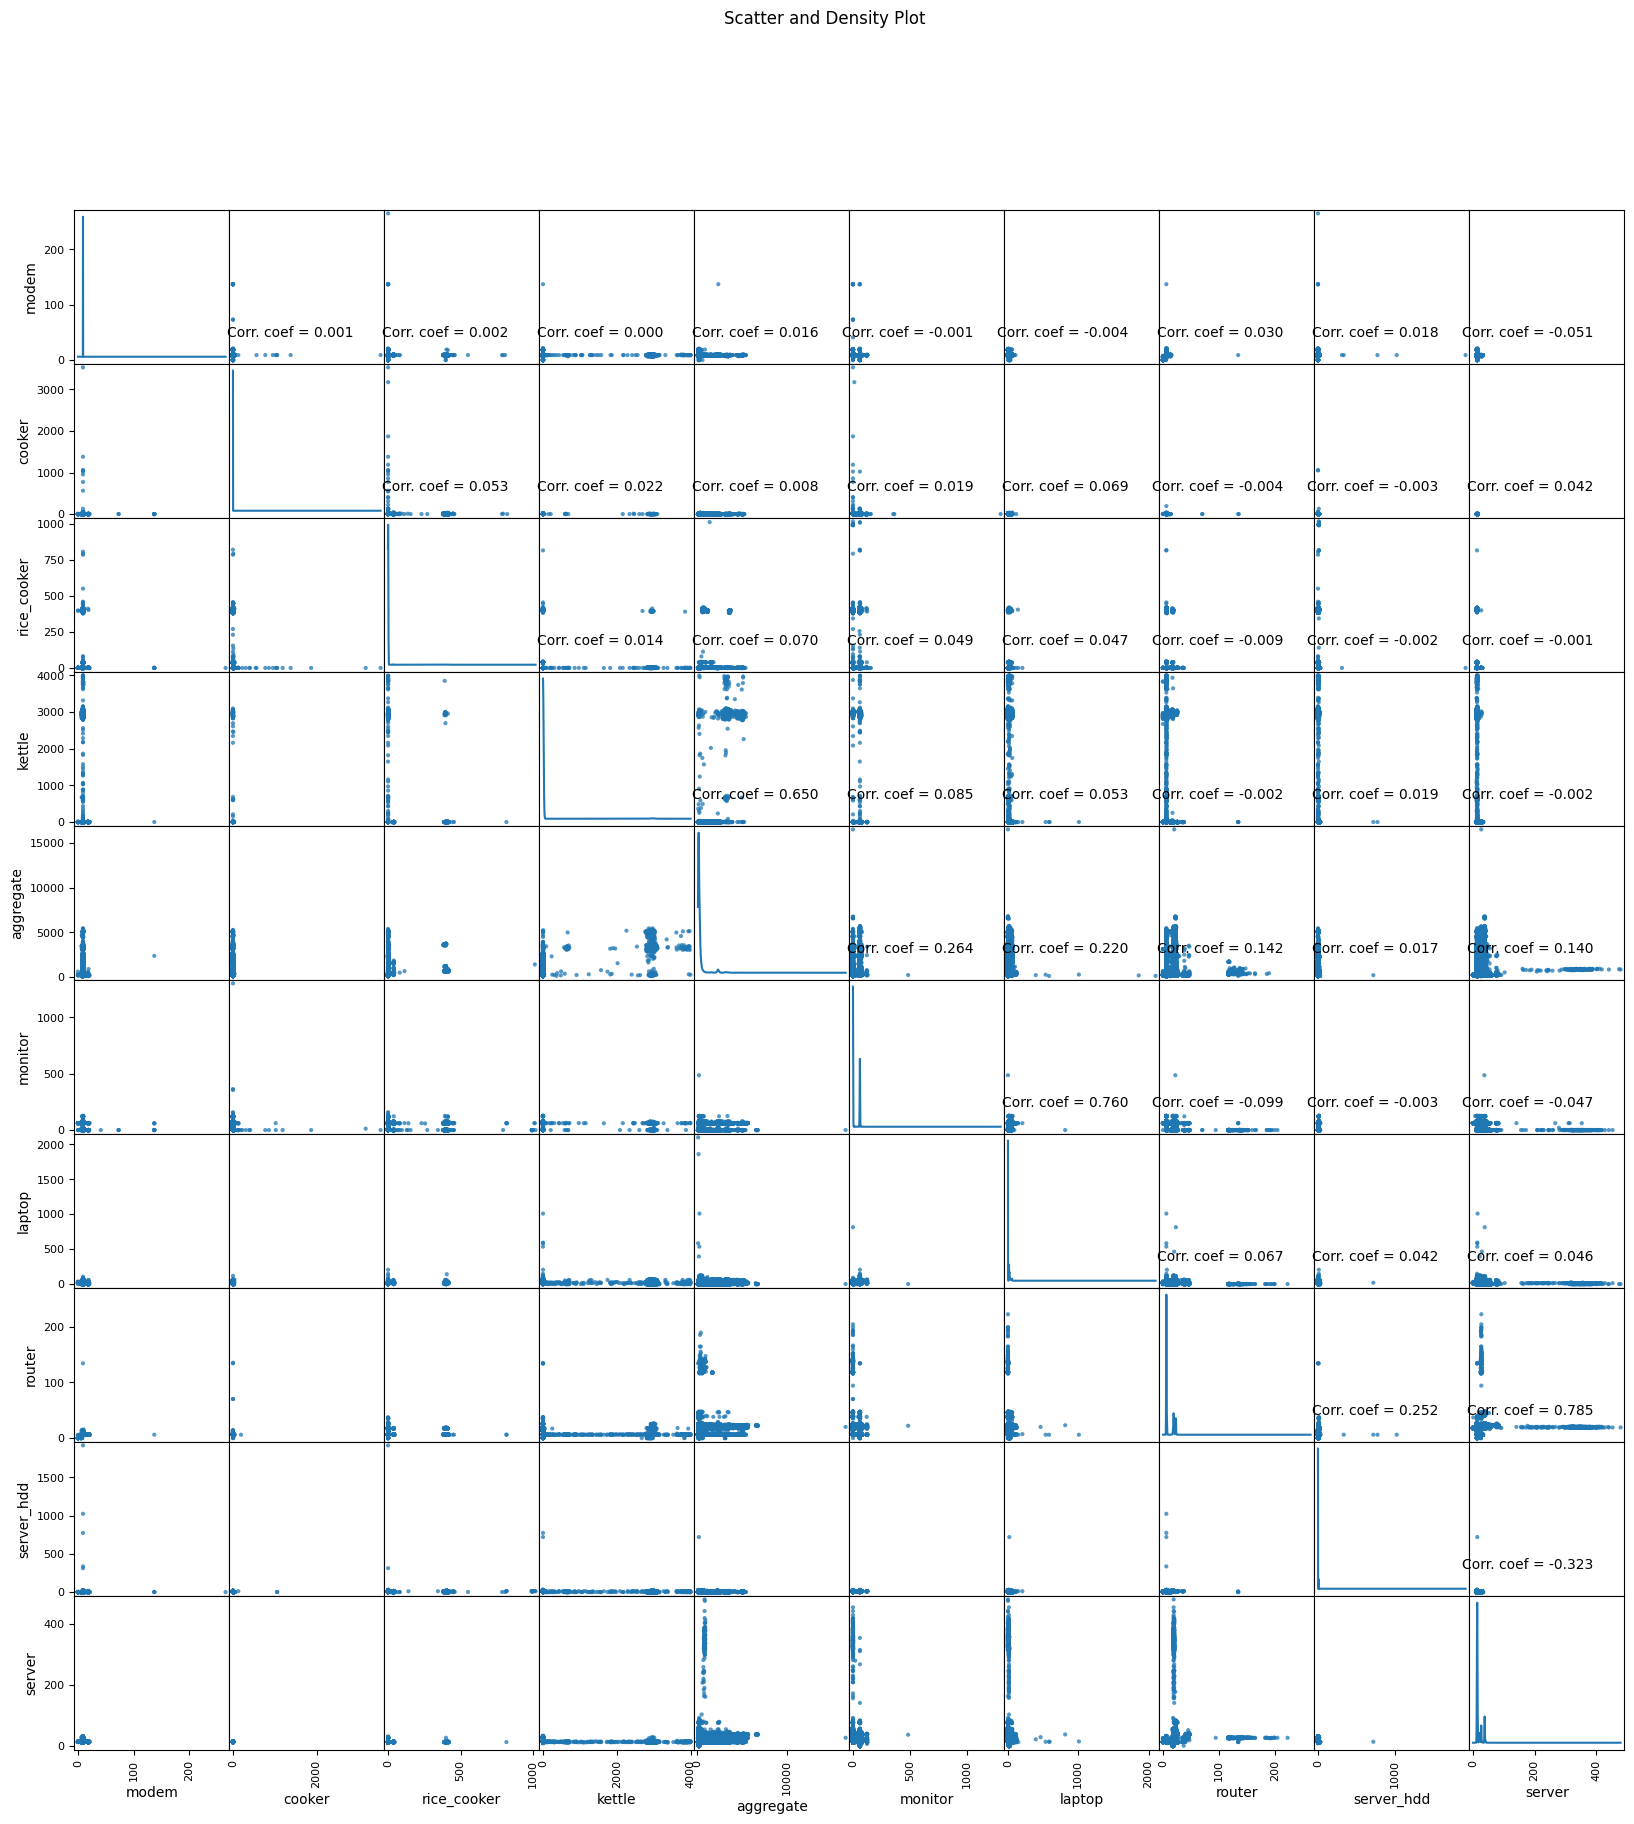

In [136]:
plotScatterMatrix(df1, 20, 10)
# plotScatterMatrix(df1, 30, 20)

In [137]:
# If raw data is used, please make sure raw_data_dir is correctly set
use_raw = False #@param

selected_hid = 2 #@param

In [138]:
df1.describe()

,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
count,1.677592e+06,1.679203e+06,2.080995e+06,2.094523e+06,2.780373e+06,2.805646e+06,2.804685e+06,2.795349e+06,2.094586e+06,2.806036e+06,2.801065e+06,1.686903e+06,1.685322e+06,1.687285e+06,1.685519e+06,1.878770e+06,2.089140e+06,1.686220e+06,1.687175e+06
mean,8.986482e+00,2.065712e-01,3.308586e+00,2.999901e+01,3.373776e+02,2.280847e+01,9.580602e+00,9.967840e+00,2.765108e+00,1.771830e+01,5.928921e+00,9.457248e-01,6.086540e-01,4.585795e+01,6.709595e+00,4.134341e+00,3.399004e+00,1.157243e+01,4.292514e+01
std,5.898772e-01,5.411729e+00,2.974451e+01,2.916419e+02,4.892145e+02,2.940439e+01,1.393829e+01,6.628239e+00,4.685827e+00,8.784269e+00,3.880836e+00,1.112636e+00,1.804222e+01,4.545345e+01,9.170054e+01,9.744350e+00,2.375296e+01,1.219902e+02,2.839677e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.670000e+02,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.120000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,6.000000e+01,1.600000e+01,1.800000e+01,1.000000e+00,1.700000e+01,1.000000e+01,1.000000e+00,1.000000e+00,8.700000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00
max,2.650000e+02,3.532000e+03,1.017000e+03,3.998000e+03,1.652900e+04,1.300000e+03,2.100000e+03,2.630000e+02,1.917000e+03,4.790000e+02,2.051000e+03,3.110000e+02,3.216000e+03,1.826000e+03,2.668000e+03,2.621000e+03,1.349000e+03,2.974000e+03,3.964000e+03


In [139]:
df1.index.min(), df1.index.max()

(Timestamp('2013-02-17 23:39:19'), Timestamp('2013-10-10 13:15:58'))

In [140]:
cutoff_st = '2013-06-01 00:00:00'
cutoff_et = '2013-09-30 23:59:59'
# cutoff_st = '2013-03-01 00:00:00'
# cutoff_et = '2013-07-31 23:59:59'
df1 = df1.loc[cutoff_st:cutoff_et]
print('{}, {}'.format(df1.index.min(), df1.index.max()))
df1.describe()

2013-06-01 00:00:00, 2013-09-30 23:59:58


,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
count,1.393005e+06,1.396874e+06,1.396576e+06,1.402749e+06,1.391002e+06,1.402752e+06,1.402774e+06,1.397161e+06,1.402784e+06,1.402794e+06,1.402525e+06,1.402212e+06,1.400604e+06,1.402672e+06,1.400815e+06,1.390381e+06,1.402192e+06,1.402098e+06,1.402556e+06
mean,8.990243e+00,2.148003e-01,3.353873e+00,2.640869e+01,3.071325e+02,2.113359e+01,8.875795e+00,6.109266e+00,6.007625e-01,1.382387e+01,6.382900e+00,9.452758e-01,5.645793e-01,4.712189e+01,6.772695e+00,4.107219e+00,3.195568e+00,1.175946e+01,4.153590e+01
std,6.217024e-01,5.571905e+00,2.983225e+01,2.729250e+02,4.566821e+02,2.870907e+01,1.293091e+01,4.329827e-01,2.140922e+00,9.514190e-01,3.732126e+00,8.617581e-01,1.659793e+01,4.513692e+01,9.192325e+01,9.795207e+00,2.368819e+01,1.232902e+02,2.793435e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.470000e+02,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.970000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.730000e+02,6.000000e+01,1.900000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,1.000000e+00,8.700000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00
max,2.650000e+02,3.532000e+03,8.210000e+02,3.998000e+03,6.361000e+03,3.640000e+02,2.100000e+03,1.340000e+02,1.917000e+03,3.300000e+01,2.400000e+01,1.200000e+02,3.216000e+03,1.826000e+03,2.668000e+03,2.621000e+03,1.349000e+03,2.974000e+03,3.955000e+03


In [141]:
df1 = df1.fillna(method='ffill').fillna(method='bfill')

In [142]:
df1 = df1.asfreq(freq='6S', method='ffill')
print(df1.shape)
df1.describe()

(1756800, 19)


,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
count,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06
mean,8.993531e+00,1.799095e-01,2.912218e+00,4.568467e+01,3.275494e+02,2.587901e+01,1.106762e+01,6.108015e+00,2.018849e+00,1.386760e+01,6.960742e+00,9.553341e-01,5.982895e-01,5.447749e+01,5.424965e+00,3.729172e+00,2.793177e+00,1.020763e+01,3.349719e+01
std,6.609501e-01,5.040695e+00,2.690448e+01,3.598391e+02,4.783851e+02,2.988756e+01,1.273327e+01,4.635816e-01,4.085768e+00,8.878696e-01,3.686237e+00,7.838813e-01,1.492556e+01,4.444674e+01,8.228449e+01,9.242025e+00,2.143408e+01,1.102549e+02,2.506067e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.700000e+02,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.210000e+02,0.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,0.000000e+00,8.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.940000e+02,6.000000e+01,2.000000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,1.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00
max,2.650000e+02,3.532000e+03,8.210000e+02,3.998000e+03,6.361000e+03,3.640000e+02,2.100000e+03,1.340000e+02,1.917000e+03,3.300000e+01,2.400000e+01,1.200000e+02,3.216000e+03,1.826000e+03,2.668000e+03,2.621000e+03,1.349000e+03,2.974000e+03,3.955000e+03


In [143]:
df1.head()

,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
time,,,,,,,,,,,,,,,,,,,
2013-06-01 00:00:00,9.0,0.0,1.0,1.0,266.0,60.0,47.0,6.0,1.0,13.0,10.0,0.0,0.0,10.0,0.0,0.0,1.0,3.0,0.0
2013-06-01 00:00:06,9.0,0.0,1.0,1.0,275.0,60.0,53.0,6.0,1.0,14.0,10.0,0.0,0.0,10.0,0.0,0.0,1.0,3.0,0.0
2013-06-01 00:00:12,9.0,0.0,1.0,1.0,262.0,60.0,50.0,7.0,1.0,14.0,10.0,0.0,0.0,10.0,0.0,0.0,1.0,3.0,0.0
2013-06-01 00:00:18,9.0,0.0,1.0,1.0,266.0,60.0,50.0,7.0,1.0,14.0,10.0,1.0,0.0,10.0,0.0,0.0,1.0,3.0,1.0
2013-06-01 00:00:24,9.0,0.0,1.0,1.0,266.0,60.0,52.0,6.0,1.0,14.0,10.0,1.0,0.0,10.0,0.0,0.0,1.0,3.0,1.0


In [144]:
df1 = df1.astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1756800 entries, 2013-06-01 00:00:00 to 2013-09-30 23:59:54
Freq: 6S
Data columns (total 19 columns):
 #   Column           Dtype
---  ------           -----
 0   modem            int64
 1   cooker           int64
 2   rice_cooker      int64
 3   kettle           int64
 4   aggregate        int64
 5   monitor          int64
 6   laptop           int64
 7   router           int64
 8   server_hdd       int64
 9   server           int64
 10  speakers         int64
 11  playstation      int64
 12  toaster          int64
 13  fridge           int64
 14  microwave        int64
 15  laptop2          int64
 16  running_machine  int64
 17  washing_machine  int64
 18  dish_washer      int64
dtypes: int64(19)
memory usage: 268.1 MB


In [145]:
df1.describe()

,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
count,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06
mean,8.993531e+00,1.799095e-01,2.912218e+00,4.568467e+01,3.275494e+02,2.587901e+01,1.106762e+01,6.108015e+00,2.018849e+00,1.386760e+01,6.960742e+00,9.553341e-01,5.982895e-01,5.447749e+01,5.424965e+00,3.729172e+00,2.793177e+00,1.020763e+01,3.349719e+01
std,6.609501e-01,5.040695e+00,2.690448e+01,3.598391e+02,4.783851e+02,2.988756e+01,1.273327e+01,4.635816e-01,4.085768e+00,8.878696e-01,3.686237e+00,7.838813e-01,1.492556e+01,4.444674e+01,8.228449e+01,9.242025e+00,2.143408e+01,1.102549e+02,2.506067e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.700000e+02,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.210000e+02,0.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,0.000000e+00,8.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.940000e+02,6.000000e+01,2.000000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,1.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00
max,2.650000e+02,3.532000e+03,8.210000e+02,3.998000e+03,6.361000e+03,3.640000e+02,2.100000e+03,1.340000e+02,1.917000e+03,3.300000e+01,2.400000e+01,1.200000e+02,3.216000e+03,1.826000e+03,2.668000e+03,2.621000e+03,1.349000e+03,2.974000e+03,3.955000e+03


In [146]:
if 'aggregate' in df1.columns:
  df1 = df1.drop('aggregate', axis=1)

df1['gross'] = df1.sum(axis=1)

In [147]:
df1.describe()

,modem,cooker,rice_cooker,kettle,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer,gross
count,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06
mean,8.993531e+00,1.799095e-01,2.912218e+00,4.568467e+01,2.587901e+01,1.106762e+01,6.108015e+00,2.018849e+00,1.386760e+01,6.960742e+00,9.553341e-01,5.982895e-01,5.447749e+01,5.424965e+00,3.729172e+00,2.793177e+00,1.020763e+01,3.349719e+01,2.353554e+02
std,6.609501e-01,5.040695e+00,2.690448e+01,3.598391e+02,2.988756e+01,1.273327e+01,4.635816e-01,4.085768e+00,8.878696e-01,3.686237e+00,7.838813e-01,1.492556e+01,4.444674e+01,8.228449e+01,9.242025e+00,2.143408e+01,1.102549e+02,2.506067e+02,4.697389e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,7.100000e+01
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,0.000000e+00,8.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.400000e+02
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.000000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,1.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,2.250000e+02
max,2.650000e+02,3.532000e+03,8.210000e+02,3.998000e+03,3.640000e+02,2.100000e+03,1.340000e+02,1.917000e+03,3.300000e+01,2.400000e+01,1.200000e+02,3.216000e+03,1.826000e+03,2.668000e+03,2.621000e+03,1.349000e+03,2.974000e+03,3.955000e+03,6.637000e+03


In [148]:
appliance_cols = ['running_machine', 'washing_machine', 'dish_washer', 'microwave', 'toaster', 'kettle', 'rice_cooker', 'cooker']
print(appliance_cols)

['running_machine', 'washing_machine', 'dish_washer', 'microwave', 'toaster', 'kettle', 'rice_cooker', 'cooker']


In [149]:
df1[['running_machine', 'washing_machine', 'dish_washer', 'microwave', 'toaster', 'kettle', 'rice_cooker', 'cooker']] = df1[appliance_cols]
df1.describe()

,modem,cooker,rice_cooker,kettle,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer,gross
count,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06
mean,8.993531e+00,1.799095e-01,2.912218e+00,4.568467e+01,2.587901e+01,1.106762e+01,6.108015e+00,2.018849e+00,1.386760e+01,6.960742e+00,9.553341e-01,5.982895e-01,5.447749e+01,5.424965e+00,3.729172e+00,2.793177e+00,1.020763e+01,3.349719e+01,2.353554e+02
std,6.609501e-01,5.040695e+00,2.690448e+01,3.598391e+02,2.988756e+01,1.273327e+01,4.635816e-01,4.085768e+00,8.878696e-01,3.686237e+00,7.838813e-01,1.492556e+01,4.444674e+01,8.228449e+01,9.242025e+00,2.143408e+01,1.102549e+02,2.506067e+02,4.697389e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,7.100000e+01
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,0.000000e+00,8.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.400000e+02
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.000000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,1.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,2.250000e+02
max,2.650000e+02,3.532000e+03,8.210000e+02,3.998000e+03,3.640000e+02,2.100000e+03,1.340000e+02,1.917000e+03,3.300000e+01,2.400000e+01,1.200000e+02,3.216000e+03,1.826000e+03,2.668000e+03,2.621000e+03,1.349000e+03,2.974000e+03,3.955000e+03,6.637000e+03


In [152]:
import openpyxl
df1.describe().to_excel('statistics.xlsx')

In [154]:
st = '2013-07-04 00:00:00'
et = '2013-07-05 00:00:00'
# st = '2013-07-03 23:59:59'
# et = '2013-07-05 00:00:05'
sub_df = df1.loc[st:et]
print(sub_df.shape)

(14401, 19)


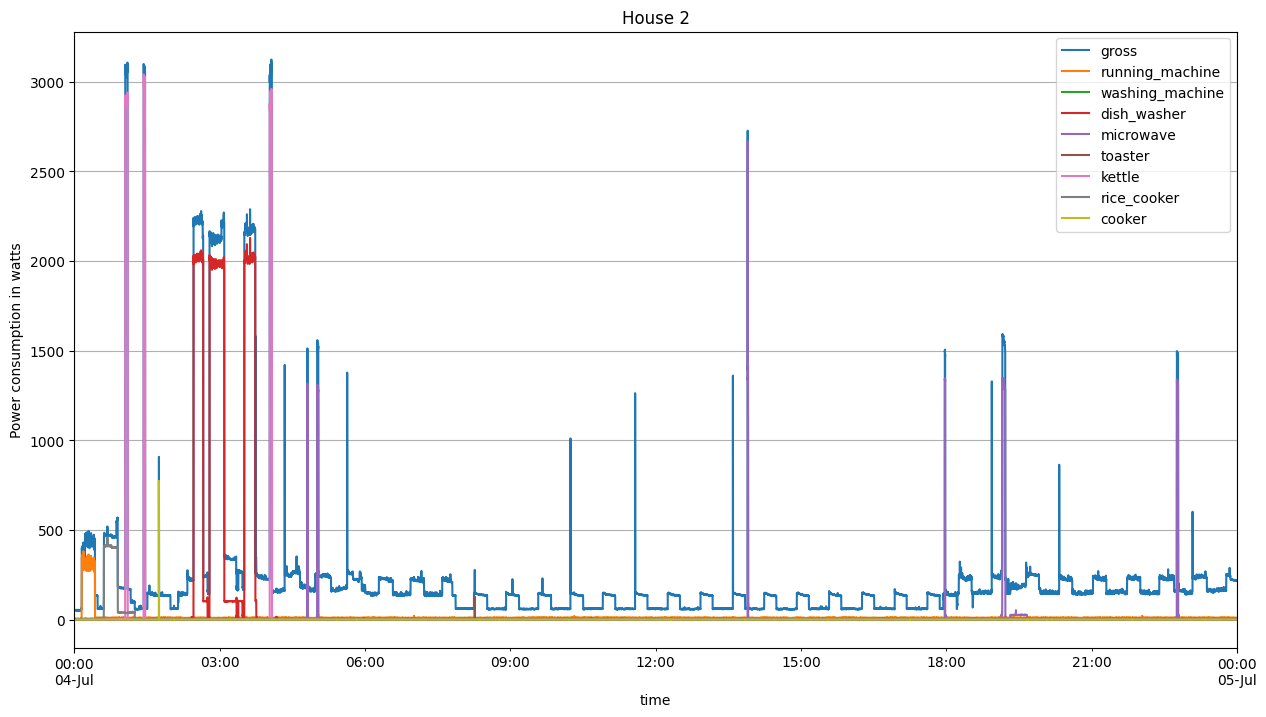

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# ax = sub_df[['gross', 'app_sum']].plot(ax=ax)
ax = sub_df[['gross', 'running_machine', 'washing_machine', 'dish_washer', 'microwave', 'toaster', 'kettle', 'rice_cooker',
             'cooker']].plot(ax=ax)
ax.grid(True)
ax.set_title('House {}'.format(selected_hid))
ax.set_ylabel('Power consumption in watts')
plt.savefig('appliances.png')

In [156]:
df1['app_sum'] = df1[appliance_cols].sum(axis=1)
df1.describe()

,modem,cooker,rice_cooker,kettle,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer,gross,app_sum
count,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06,1.756800e+06
mean,8.993531e+00,1.799095e-01,2.912218e+00,4.568467e+01,2.587901e+01,1.106762e+01,6.108015e+00,2.018849e+00,1.386760e+01,6.960742e+00,9.553341e-01,5.982895e-01,5.447749e+01,5.424965e+00,3.729172e+00,2.793177e+00,1.020763e+01,3.349719e+01,2.353554e+02,1.012980e+02
std,6.609501e-01,5.040695e+00,2.690448e+01,3.598391e+02,2.988756e+01,1.273327e+01,4.635816e-01,4.085768e+00,8.878696e-01,3.686237e+00,7.838813e-01,1.492556e+01,4.444674e+01,8.228449e+01,9.242025e+00,2.143408e+01,1.102549e+02,2.506067e+02,4.697389e+02,4.649709e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01,2.000000e+00
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,7.100000e+01,7.000000e+00
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,0.000000e+00,8.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.400000e+02,8.000000e+00
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.000000e+01,6.000000e+00,1.000000e+00,1.400000e+01,1.000000e+01,1.000000e+00,1.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,2.250000e+02,9.000000e+00
max,2.650000e+02,3.532000e+03,8.210000e+02,3.998000e+03,3.640000e+02,2.100000e+03,1.340000e+02,1.917000e+03,3.300000e+01,2.400000e+01,1.200000e+02,3.216000e+03,1.826000e+03,2.668000e+03,2.621000e+03,1.349000e+03,2.974000e+03,3.955000e+03,6.637000e+03,6.399000e+03


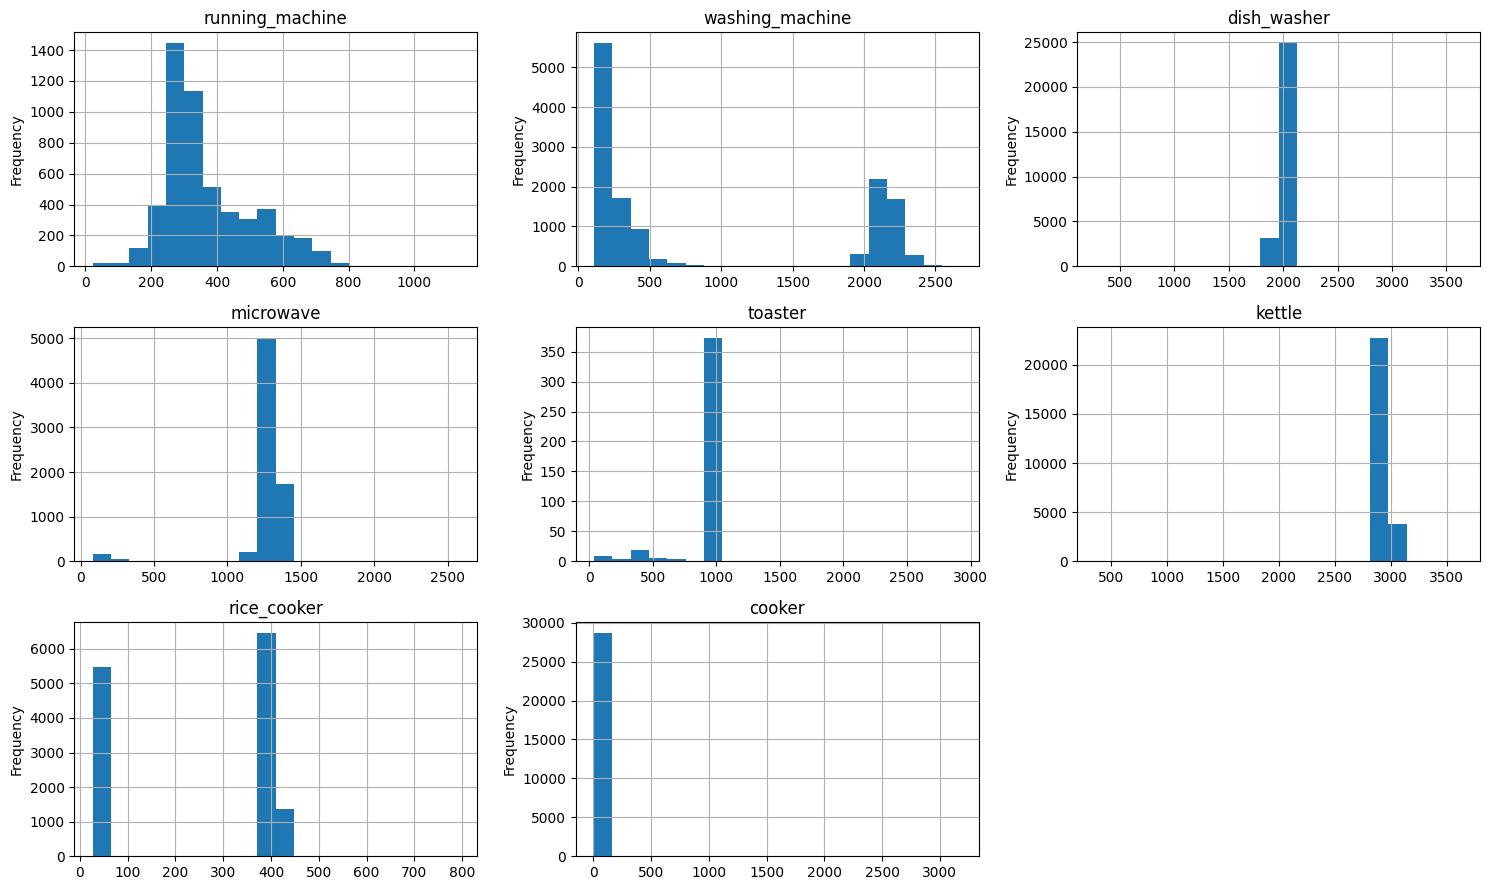

In [157]:
nrow = int(np.ceil(np.sqrt(len(appliance_cols))))
ncol = int(np.ceil(1.0 * len(appliance_cols) / nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(5*ncol, 3*nrow))
axes[-1, -1].axis('off')

for i, app in enumerate(appliance_cols):
  row_ix = i // 3
  col_ix = i % 3
  ax = axes[row_ix][col_ix]
  lb = df1[app].std()
  ub = df1[app].max() - lb
  df1[app + '_on'] = df1[app].apply(
      lambda x: 1 if x > lb else 0)
  df1[app][(df1[app] > lb) & (df1[app] < ub)].plot.hist(bins=20, ax=ax)
  ax.set_title(app)
  ax.grid(True)

plt.tight_layout()
plt.savefig('histograms.png')

In [158]:
df1.mean(axis=0)

modem                   8.993531
cooker                  0.179909
rice_cooker             2.912218
kettle                 45.684668
monitor                25.879006
laptop                 11.067621
router                  6.108015
server_hdd              2.018849
server                 13.867601
speakers                6.960742
playstation             0.955334
toaster                 0.598290
fridge                 54.477487
microwave               5.424965
laptop2                 3.729172
running_machine         2.793177
washing_machine        10.207630
dish_washer            33.497187
gross                 235.355403
app_sum               101.298045
running_machine_on      0.002954
washing_machine_on      0.007450
dish_washer_on          0.015989
microwave_on            0.004114
toaster_on              0.000238
kettle_on               0.015229
rice_cooker_on          0.007583
cooker_on               0.016298
dtype: float64

In [159]:
train_st = '2013-06-01 00:00:00'
train_et = '2013-07-31 23:59:59'
train_data = df1.loc[train_st:train_et]
print(train_data.shape)

valid_st = '2013-08-01 00:00:00'
valid_et = '2013-08-31 23:59:59'
valid_data = df1.loc[valid_st:valid_et]
print(valid_data.shape)

test_st = '2013-09-01 00:00:00'
test_et = '2013-09-30 23:59:59'
test_data = df1.loc[test_st:test_et]
print(test_data.shape)

(878400, 28)
(446400, 28)
(432000, 28)


In [160]:
train_data.to_csv('train.csv')
valid_data.to_csv('valid.csv')
test_data.to_csv('test.csv')

In [161]:
train_data = pd.read_csv('train.csv', index_col=0)
print(pd.Series(train_data.columns))
train_data.head()

0                  modem
1                 cooker
2            rice_cooker
3                 kettle
4                monitor
5                 laptop
6                 router
7             server_hdd
8                 server
9               speakers
10           playstation
11               toaster
12                fridge
13             microwave
14               laptop2
15       running_machine
16       washing_machine
17           dish_washer
18                 gross
19               app_sum
20    running_machine_on
21    washing_machine_on
22        dish_washer_on
23          microwave_on
24            toaster_on
25             kettle_on
26        rice_cooker_on
27             cooker_on
dtype: object


,modem,cooker,rice_cooker,kettle,monitor,laptop,router,server_hdd,server,speakers,...,gross,app_sum,running_machine_on,washing_machine_on,dish_washer_on,microwave_on,toaster_on,kettle_on,rice_cooker_on,cooker_on
time,,,,,,,,,,,,,,,,,,,,,
2013-06-01 00:00:00,9,0,1,1,60,47,6,1,13,10,...,162,6,0,0,0,0,0,0,0,0
2013-06-01 00:00:06,9,0,1,1,60,53,6,1,14,10,...,169,6,0,0,0,0,0,0,0,0
2013-06-01 00:00:12,9,0,1,1,60,50,7,1,14,10,...,167,6,0,0,0,0,0,0,0,0
2013-06-01 00:00:18,9,0,1,1,60,50,7,1,14,10,...,169,7,0,0,0,0,0,0,0,0
2013-06-01 00:00:24,9,0,1,1,60,52,6,1,14,10,...,170,7,0,0,0,0,0,0,0,0


In [162]:
appliance_cols = [x for x in train_data.columns if '_on' in x]
print(train_data[appliance_cols].mean())

running_machine_on    0.002672
washing_machine_on    0.008931
dish_washer_on        0.018990
microwave_on          0.005001
toaster_on            0.000322
kettle_on             0.007234
rice_cooker_on        0.007342
cooker_on             0.018437
dtype: float64


In [163]:
test_data = pd.read_csv('test.csv', index_col=0)
print(test_data.shape)
print(test_data[appliance_cols].mean())

(432000, 28)
running_machine_on    0.004553
washing_machine_on    0.006600
dish_washer_on        0.016924
microwave_on          0.004227
toaster_on            0.000104
kettle_on             0.008106
rice_cooker_on        0.007706
cooker_on             0.016333
dtype: float64


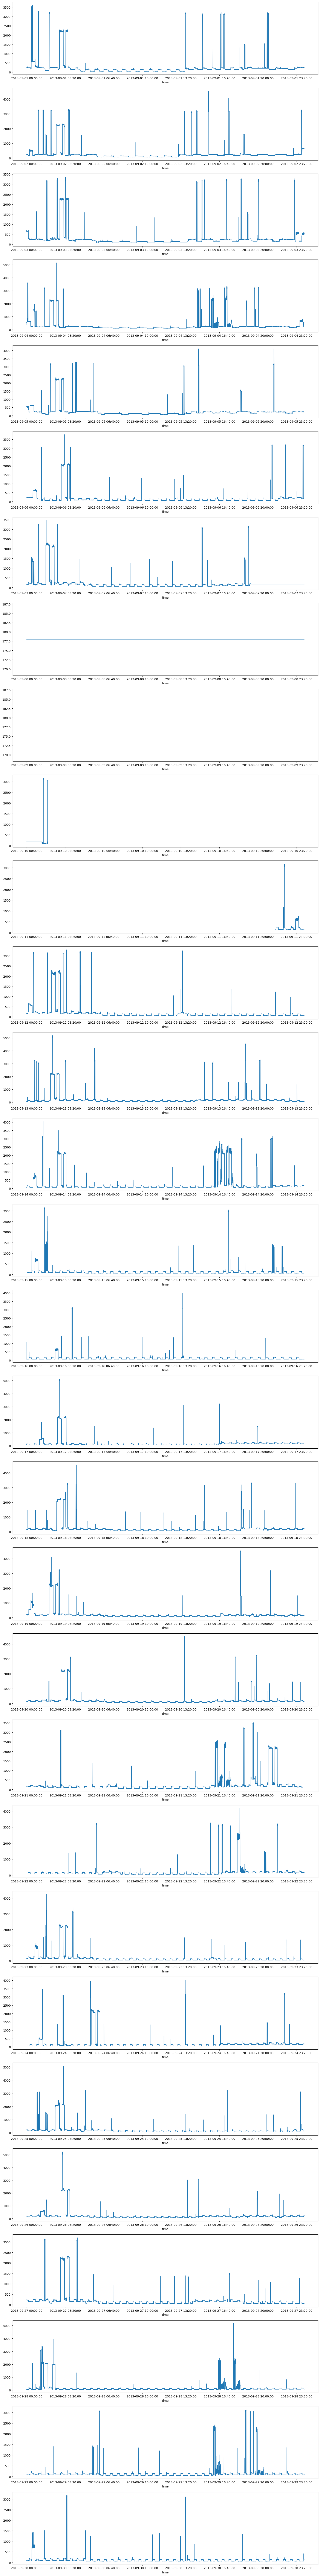

In [164]:
ss = ['2013-09-{0:02d} 00:00:00'.format(i+1) for i in range(30)]
ee = ['2013-09-{0:02d} 23:59:59'.format(i+1) for i in range(30)]
# ss = ['2013-07-{0:02d} 00:00:00'.format(i+1) for i in range(30)]
# ee = ['2013-07-{0:02d} 23:59:59'.format(i+1) for i in range(30)]

fig, axes = plt.subplots(30, 1, figsize=(15, 120))
for i, (s, e) in enumerate(zip(ss, ee)):
  test_data.loc[s:e].gross.plot(ax=axes[i])
  axes[i].set
plt.tight_layout()
plt.savefig('daily.png')